In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [3]:
from LayerModel5 import *

In [4]:
from frame import *

In [ ]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [5]:
dt_df = pd.read_csv('data_csv\\0601012.XSHG.csv',index_col=0,parse_dates=True)
stockID ='601012'

In [6]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))
dt_df['tm'] =dt_df.index

In [7]:
dt_df.head()

,high,close,open,volume,low,total_turnover,TmIdx,tm
datetime,,,,,,,,
2019-01-02 09:35:00,14.1740,14.1099,13.9658,1007772.0,13.9658,17750964.0,0,2019-01-02 09:35:00
2019-01-02 09:40:00,14.1259,14.0458,14.1099,700900.0,13.9898,12322324.0,1,2019-01-02 09:40:00
2019-01-02 09:45:00,14.1019,14.0779,14.0458,434420.0,13.9978,7623568.0,2,2019-01-02 09:45:00
2019-01-02 09:50:00,14.3261,14.3261,14.0779,929820.0,14.0298,16444282.0,3,2019-01-02 09:50:00
2019-01-02 09:55:00,14.3341,14.1419,14.3261,1039060.0,14.1099,18488660.0,4,2019-01-02 09:55:00


## get data list

In [8]:
dt = dt_df[['open','high','low','close','TmIdx','tm']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
dt[300][5].strftime("%Y-%m-%d")

In [ ]:
len(dt)

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

### Get 属性数据

In [9]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [10]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [11]:
m = Market(stockID, 4)
Stick.mm = m
Trend.m = m
Trend.ef = ef
Pair.m = m
PairChain.m = m
PairChain.ef = ef
CenterStrict.m = m
CenterStrict.ef = ef
#Signal001.m = m
#Signal001.ef = ef

In [12]:
Stick.L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0, 13.9658, 0))

In [13]:
TrendLv1 = type('TrendLv1', (Trend,), {'L':m.Lv1_L, 'ML':Stick.L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'L':m.Lv2_L, 'ML':TrendLv1.L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'L':m.Lv3_L, 'ML':TrendLv2.L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0, 13.9658, 0))

In [14]:

Center0 = type('Center0', (CenterStrict,), {'ML': m.findList('st', 0), 'L': m.findList('center', 0), 'openL':[],  'level': 0})
Center0()
Center1 = type('Center1', (CenterStrict,), {'ML': m.findList('st', 1), 'L': m.findList('center', 1), 'openL':[],  'level': 1})
Center1()
Center2 = type('Center2', (CenterStrict,), {'ML': m.findList('st', 2), 'L': m.findList('center', 2), 'openL':[],  'level': 2})
Center2()
Center3 = type('Center3', (CenterStrict,), {'ML': m.findList('st', 3), 'L': m.findList('center', 3), 'openL':[],  'level': 3})
Center3()

Center3(0, 1, 0, 0)

In [15]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv3 = PairChain(3, 'PairChainLv3')

In [16]:
SIG_overlap.m, SIG_overlap.ef = m, ef
SIG_overlap()
actions = []
level = 2
actions.append({ 'level_num': level, 
            'obj_name': 'TrendLv' +str(int(level)),
            'event_name': 'NEW',
            'obj_p': 'SIG_overlap',
            'method': 'any_opp',
            'param': str(level)  })
for ac in actions:
    ef.regAction(**ac)

In [17]:
SIG_CCrawl.m, SIG_CCrawl.ef = m, ef
SIG_CCrawl([2])
actions = []
level = 2
actions.append({ 'level_num': level, 
            'obj_name': 'Center' +str(int(level)),
            'event_name': 'NEW10',
            'obj_p': 'SIG_CCrawl',
            'method': 'any_opp',
            'param': str(level)  })
for ac in actions:
    ef.regAction(**ac)

In [ ]:
Signal001.L = m.SIG_L
Signal001()

In [ ]:
Position.m = m
Position.L = m.position

In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [18]:
m.__dict__

{'stockID': '601012',
 'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0, 13.9658, 0))],
   [Trend1(0, 0, Point(0, 13.9658, 0))],
   [Trend2(0, 0, Point(0, 13.9658, 0))],
   [Trend3(0, 0, Point(0, 13.9658, 0))],
   []],
  'pair': [[Pair0(TmS:0, 0, [0])],
   [Pair0(TmS:0, 0, [0])],
   [Pair0(TmS:0, 0, [0])],
   [Pair0(TmS:0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x19a6bef0>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[], [], [], [], []],
  'center': [[Center0(0, 1, 0, 0)],
   [Center1(0, 1, 0, 0)],
   [Center2(0, 1, 0, 0)],
   [Center3(0, 1, 0, 0)],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0, 13.9658, 0))],
 'PLv0_L': [Pair0(TmS:0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x19a6bef0>],
 'MPLv0_L': [],
 'PT01Lv0_L': [],
 'CLv0_L': [Center0(0, 1, 0, 0)],
 'Lv1_L': [Trend1(0, 0, Point(0, 13.9658, 0))],
 'PLv1_L': [Pair0(TmS:0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x19a5dcc0>],
 'MPLv1_L': [],
 'PT01L

In [19]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2', 'update2', 'updateAll'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]', 'Center0'],
    'param': ['', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'Center0': {'NEW10': {'method': [], 'obj_p': [], 'param': []}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []},
   'NEW_llv': {'method': ['newCenter'],
    'obj_p': ['m.CLv0_L[0]'],
    'param': ['obj="pair", level=0, i=-1']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'newCenter'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]', 'Center1', 'm.CLv0_L[0]'],
    'param': ['', '', '', 'obj="st", level=1, i=-1']},
   'PEAK': {'method': ['updateLastSt'],
 

In [20]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:6,[[<frame.Event object at 0x0000000019A6B2E8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7,[[<frame.Event object at 0x0000000019A6B080>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:8,[[<frame.Event object at 0x0000000019A6B5C0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:9,[[<frame.Event object at 0x0000000019A6BB00>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10,[[<frame.Event object at 0x0000000019A6BAC8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11,[[<frame.Event object at 0x0000000019A6BB70>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14,[[<frame.Event object at 0x0000000019A6BDA0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:15,[[<frame.Event object at 0x0000000019A6BA90>, <frame.Event object at 0x0000000019A6B5F8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16,[[<frame.Event object at 0x0000000019A6BA90>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18,[[<frame.Event object at 0x0000000019A5DE10>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19,[[<frame.Event object at 0x0000000019A5D0F0>]]
m.L

Center0.updateAll()
TmIdx:702,[[<frame.Event object at 0x0000000019B469E8>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:703,[[<frame.Event object at 0x0000000019B46F28>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:708,[[<frame.Event object at 0x0000000019B50128>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:709,[[<frame.Event object at 0x0000000019B502E8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:713,[[<frame.Event object at 0x0000000019B502B0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:713,[[<frame.Event object at 0x0000000019B502E8>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:714,[[<frame.Event object at 0x0000000019B50668>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:721,[[<frame.Event object at 0x0000000019B508D0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:722,[[<frame.Event object at 0x0000000019B50668>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1095,[[<frame.Event object at 0x0000000019BB8518>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1097,[[<frame.Event object at 0x0000000019BB8588>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1104,[[<frame.Event object at 0x0000000019BB8710>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1104,[[<frame.Event object at 0x0000000019BB8588>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:1104,[[<frame.Event object at 0x0000000019BB8710>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1105,[[<frame.Event object at 0x0000000019BB8C18>]]
TmIdx:1105,[[<frame.Event object at 0x0000000019BB8E10>]]
TmIdx:1107,[[<frame.Event object at 0x0000000019BB8C88>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1107,[[<frame.Event object at 0x0000000019BB8710>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1597,[[<frame.Event object at 0x0000000019C49978>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1598,[[<frame.Event object at 0x0000000019C49898>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1603,[[<frame.Event object at 0x0000000019C49BA8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1607,[[<frame.Event object at 0x0000000019C49F98>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1611,[[<frame.Event object at 0x0000000019C4D160>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1612,[[<frame.Event object at 0x0000000019C4D400>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1620,[[<frame.Event object at 0x0000000019C4D710>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:1621,[[<frame.Event object at 0x0000000019C4D438>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1626,[[<frame.Even

Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:2030,[[<frame.Event object at 0x0000000019CD2080>]]
TmIdx:2030,[[<frame.Event object at 0x0000000019CD2438>, <frame.Event object at 0x0000000019CD24E0>, <frame.Event object at 0x0000000019CD2588>, <frame.Event object at 0x0000000019CD2630>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:2030,[[<frame.Event object at 0x0000000019CD2748>, <frame.Event object at 0x0000000019CD27B8>, <frame.Event object at 0x0000000019CD2860>]]
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
SIG_CCrawl.any_opp(2)
TmIdx:2032,[[<frame.Event object at 0x0000000019CD20F0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:2032,[[<frame.Event object at 0x0000000019CD2860>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2(

m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:2549,[[<frame.Event object at 0x0000000019D6F6A0>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2550,[[<frame.Event object at 0x0000000019D6FBE0>]]
TmIdx:2550,[[<frame.Event object at 0x0000000019D6FD30>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:2555,[[<frame.Event object at 0x0000000019D6FC50>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:2555,[[<frame.Event object at 0x0000000019D6FD30>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2556,[[<frame.Event object at 0x0000000019D790B8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2558,[[<frame.Event object at 0x0000000019D6FD30>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:2560,[[<frame.Event object at 0x0000000019D791D0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:2561,[[<frame.Event object at 0x0000000019D79240>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:2562,[[<frame.Event object at 0x0

m.PCLv2_L[0].update2()
Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:2976,[[<frame.Event object at 0x0000000019DE0EB8>]]

TmIdx:2977,[[<frame.Event object at 0x0000000019DE35F8>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:2977,[[<frame.Event object at 0x0000000019DE3748>]]
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:2980,[[<frame.Event object at 0x0000000019DE3470>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:2980,[[<frame.Event object at 0x0000000019DE3748>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2981,[[<frame.Event object at 0x0000000019DE3A58>]]
TmIdx:2982,[[<frame.Event object at 0x0000000019DE3AC8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:2983,[[<frame.Event object at 0x0000000019DE39B0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2984,[[<frame.Event object at 0x0000000019DE3A90>]]
m.PCLv0_L[0].updateLas

Center3.updateAll()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:3544,[[<frame.Event object at 0x0000000019E54208>, <frame.Event object at 0x0000000019E54278>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:3544,[[<frame.Event object at 0x0000000019E543C8>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:3544,[[<frame.Event object at 0x0000000019E545F8>]]
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:3544,[[<frame.Event object at 0x000000001970A668>]]
TmIdx:3545,[[<frame.Event object at 0x0000000019E54588>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:3546,[[<frame.Event object at 0x0000000019E54438>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:3547,[[<frame.Event object at 0x0000000019E54748>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:3549,[[<frame.Event object at 0x0000000019E54828>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:3552,[[<frame.Event object at 0x0000000019E54748>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3555,[[<frame.Event object at 0x00

Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:3971,[[<frame.Event object at 0x0000000019EE03C8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3976,[[<frame.Event object at 0x0000000019EE0438>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:3976,[[<frame.Event object at 0x0000000019EE03C8>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3977,[[<frame.Event object at 0x0000000019EE0898>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3982,[[<frame.Event object at 0x0000000019EE09E8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:3983,[[<frame.Event object at 0x0000000019EE08D0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3992,[[<frame.Event object at 0x0000000019EE0B70>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:3992,[[<frame.Event object at 0x0000000019EE08D0>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(

Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:4416,[[<frame.Event object at 0x0000000019F619E8>]]

TmIdx:4417,[[<frame.Event object at 0x0000000019F682B0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4417,[[<frame.Event object at 0x0000000019F68470>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:4417,[[<frame.Event object at 0x0000000019F685F8>]]
TmIdx:4422,[[<frame.Event object at 0x0000000019F68320>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:4422,[[<frame.Event object at 0x0000000019F68470>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4423,[[<frame.Event object at 0x0000000019F68940>]]
TmIdx:4428,[[<frame.Event object at 0x0000000019F68AC8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:4429,[[<frame.Event object at 0x0000000019F686A0>, <frame.Event object at 0x0000000019F68978>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:4430,[[<frame.Ev

Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4803,[[<frame.Event object at 0x0000000019FF78D0>]]
TmIdx:4803,[[<frame.Event object at 0x0000000019FF7860>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:4804,[[<frame.Event object at 0x0000000019FF7908>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:4804,[[<frame.Event object at 0x0000000019FF7940>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4805,[[<frame.Event object at 0x0000000019FF7C18>, <frame.Event object at 0x0000000019FF7A20>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:4806,[[<frame.Event object at 0x0000000019FF7860>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4808,[[<frame.Event object at 0x0000000019FF7DA0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:4808,[[<frame.Event object at 0x0000000019FF7C18>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4809,[[<frame.Event object at 0x000000001A0

TmIdx:5166,[[<frame.Event object at 0x000000001A06CD30>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5167,[[<frame.Event object at 0x000000001A079128>, <frame.Event object at 0x000000001A06CFD0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5168,[[<frame.Event object at 0x000000001A079048>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5169,[[<frame.Event object at 0x000000001A079198>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5170,[[<frame.Event object at 0x000000001A0792B0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5171,[[<frame.Event object at 0x000000001A079358>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5172,[[<frame.Event object at 0x000000001A079400>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5174,[[<frame.Event object at 0x000000001A0794E0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5180,[[<frame.Event object at 0x000000001A079748>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:5181,[[<frame.Event object at 0x000000001A079358>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5183,[[<

m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:5501,[[<frame.Event object at 0x000000001A0D28D0>]]
TmIdx:5503,[[<frame.Event object at 0x000000001A0D27B8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:5503,[[<frame.Event object at 0x000000001A0D2630>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5504,[[<frame.Event object at 0x000000001A0D2B38>, <frame.Event object at 0x000000001A0D2A90>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:5505,[[<frame.Event object at 0x000000001A0D2BA8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5509,[[<frame.Event object at 0x000000001A0D2D30>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:5510,[[<frame.Event object at 0x000000001A0D2B38>, <frame.Event object at 0x000000001A0D2EB8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:5511,[[<frame.Event object at 0x000000001A0D2F60>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5515,[[

TmIdx:5865,[[<frame.Event object at 0x000000001A138518>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:5865,[[<frame.Event object at 0x000000001A12FE10>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5866,[[<frame.Event object at 0x000000001A138748>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5869,[[<frame.Event object at 0x000000001A1387F0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:5869,[[<frame.Event object at 0x000000001A138780>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5870,[[<frame.Event object at 0x000000001A138B70>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5872,[[<frame.Event object at 0x000000001A138A90>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5875,[[<frame.Event object at 0x000000001A138B70>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5877,[[<frame.Event object at 0x000000001A138C88>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:5878,[[<frame.Event object at 0x000000001A138D30>]]
m.PCLv0_L[0].updateLastSt()


TmIdx:6236,[[<frame.Event object at 0x000000001A196470>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6239,[[<frame.Event object at 0x000000001A1965F8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6241,[[<frame.Event object at 0x000000001A196908>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6242,[[<frame.Event object at 0x000000001A196748>]]
TmIdx:6244,[[<frame.Event object at 0x000000001A196A90>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6244,[[<frame.Event object at 0x000000001A196908>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:6244,[[<frame.Event object at 0x000000001A196BE0>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6245,[[<frame.Event object at 0x000000001A196F60>]]
TmIdx:6245,[[<frame.Event object at 0x000000001A196E10>, <frame.Event object at 0x000000001A1A01D0>]]
TmIdx:6251,[[<frame.Ev

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6632,[[<frame.Event object at 0x000000001A201048>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6633,[[<frame.Event object at 0x000000001A2016A0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6635,[[<frame.Event object at 0x000000001A201748>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6641,[[<frame.Event object at 0x000000001A201908>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:6642,[[<frame.Event object at 0x000000001A201C50>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6643,[[<frame.Event object at 0x000000001A201C18>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:6644,[[<frame.Event object at 0x000000001A201CF8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:6645,[[<frame.Event object at 0x000000001A201DD8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6648,[[<frame.Event object at 0x000000001A201F60>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Cent

TmIdx:7004,[[<frame.Event object at 0x000000001A26D6D8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:7004,[[<frame.Event object at 0x000000001A26D550>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7004,[[<frame.Event object at 0x000000001A26D6D8>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7005,[[<frame.Event object at 0x000000001A26DA90>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7005,[[<frame.Event object at 0x000000001A26DC18>]]
TmIdx:7008,[[<frame.Event object at 0x000000001A26DB00>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:7008,[[<frame.Event object at 0x000000001A26DA90>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7009,[[<frame.Event object at 0x000000001A26DE10>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7015,[[<frame.Event object at 0x000000001A26DFD0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updat

TmIdx:7372,[[<frame.Event object at 0x000000001A2DA828>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:7372,[[<frame.Event object at 0x000000001A2DA240>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7373,[[<frame.Event object at 0x000000001A2DAA58>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7377,[[<frame.Event object at 0x000000001A2DA9E8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:7379,[[<frame.Event object at 0x000000001A2DABE0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7400,[[<frame.Event object at 0x000000001A2DD3C8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:7401,[[<frame.Event object at 0x000000001A2DD588>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7402,[[<frame.Event object at 0x000000001A2DD550>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:7404,[[<frame.Event object at 0x000000001A2DD6D8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:7406,[[<frame.Event object at 0x000000001A2DD7B8>]]
m.PCLv0_L[0].updateLastSt()


m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:7758,[[<frame.Event object at 0x000000001A344748>]]

TmIdx:7759,[[<frame.Event object at 0x000000001A344A20>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:7759,[[<frame.Event object at 0x000000001A344B70>, <frame.Event object at 0x000000001A344A90>]]
SIG_CCrawl.any_opp(2)
TmIdx:7764,[[<frame.Event object at 0x000000001A344908>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:7765,[[<frame.Event object at 0x000000001A344F28>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7769,[[<frame.Event object at 0x000000001A34B128>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:7770,[[<frame.Event object at 0x000000001A34B2B0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:7771,[[<frame.Event object at 0x000000001A34B278>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:7772,[[<frame.Event

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:8098,[[<frame.Event object at 0x000000001A3A4908>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8099,[[<frame.Event object at 0x000000001A3A8048>]]
TmIdx:8099,[[<frame.Event object at 0x000000001A3A4D30>]]
TmIdx:8103,[[<frame.Event object at 0x000000001A3A80B8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:8103,[[<frame.Event object at 0x000000001A3A4908>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8104,[[<frame.Event object at 0x000000001A3A8400>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8108,[[<frame.Event object at 0x000000001A3A8550>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:8109,[[<frame.Event object at 0x000000001A3A8438>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8113,[[<frame.Event object at 0x000000001A3A86D8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0

SIG_CCrawl.established()
TmIdx:8402,[[<frame.Event object at 0x000000001A41A160>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8402,[[<frame.Event object at 0x000000001A41A320>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:8402,[[<frame.Event object at 0x000000001A41A198>]]
TmIdx:8403,[[<frame.Event object at 0x000000001A41A1D0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:8403,[[<frame.Event object at 0x000000001A41A320>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8404,[[<frame.Event object at 0x000000001A41A5F8>]]
TmIdx:8410,[[<frame.Event object at 0x000000001A41A898>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:8411,[[<frame.Event object at 0x000000001A41A470>, <frame.Event object at 0x000000001A41A630>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:8412,[[<frame.Event object at 0x000000001A41A320>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:8413,[[<frame.Event object at 

Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8864,[[<frame.Event object at 0x000000001A4A8978>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8865,[[<frame.Event object at 0x000000001A4A8EF0>]]
TmIdx:8865,[[<frame.Event object at 0x000000001A4BC080>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:8872,[[<frame.Event object at 0x000000001A4A8F60>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:8872,[[<frame.Event object at 0x000000001A4BC080>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8873,[[<frame.Event object at 0x000000001A4BC400>, <frame.Event object at 0x000000001A4BC208>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:8873,[[<frame.Event object at 0x000000001A4BC198>]]
TmIdx:8874,[[<frame.Event object at 0x000000001A4BC550>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:8878,[[<frame.Event object at 0x000000001A4BC390

Center0.updateAll()
TmIdx:9247,[[<frame.Event object at 0x000000001A53A160>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9248,[[<frame.Event object at 0x000000001A53A438>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:9248,[[<frame.Event object at 0x000000001A53A160>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9248,[[<frame.Event object at 0x000000001A530E80>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9249,[[<frame.Event object at 0x000000001A53A7B8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9249,[[<frame.Event object at 0x000000001A53A8D0>, <frame.Event object at 0x000000001A53A9E8>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:9250,[[<frame.Event object at 0x000000001A53A828>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:9250,[[<frame.Event object at 0x000000001A53A8D0>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmI

Center0.updateAll()
TmIdx:9756,[[<frame.Event object at 0x000000001A5E64A8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9761,[[<frame.Event object at 0x000000001A5E6080>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:9761,[[<frame.Event object at 0x000000001A5E64A8>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9762,[[<frame.Event object at 0x000000001A5E6908>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9762,[[<frame.Event object at 0x000000001A5E6898>, <frame.Event object at 0x000000001A5E6B70>, <frame.Event object at 0x000000001A5E6C18>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:9766,[[<frame.Event object at 0x000000001A5E6978>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:9766,[[<frame.Event object at 0x000000001A5E6C18>]]

TmIdx:10123,[[<frame.Event object at 0x000000001A64B0B8>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10123,[[<frame.Event object at 0x000000001A64B400>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10124,[[<frame.Event object at 0x000000001A64B748>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10124,[[<frame.Event object at 0x000000001A64B940>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:10132,[[<frame.Event object at 0x000000001A64B7F0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:10132,[[<frame.Event object at 0x000000001A64B940>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10133,[[<frame.Event object at 0x000000001A64BDD8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10135,[[<frame.Event object at 0x000000001A64BE80>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:10136,[[<frame.Event object at 0x000000001A654080>]]


Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:10473,[[<frame.Event object at 0x000000001A6B32B0>]]

TmIdx:10474,[[<frame.Event object at 0x000000001A6B3E10>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:10484,[[<frame.Event object at 0x000000001A6B3CF8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:10484,[[<frame.Event object at 0x000000001A6B3E10>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10485,[[<frame.Event object at 0x000000001A6BE4A8>]]
TmIdx:10486,[[<frame.Event object at 0x000000001A6BE390>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10489,[[<frame.Event object at 0x000000001A6BE4A8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10496,[[<frame.Event object at 0x000000001A6BE8D0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:10497,[[<frame.Event object at 0x000000001A6BE400>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10498,[[<fr

m.PCLv0_L[0].updateLastSt()
TmIdx:10768,[[<frame.Event object at 0x000000001A7260F0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10769,[[<frame.Event object at 0x000000001A726240>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10770,[[<frame.Event object at 0x000000001A7262B0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10772,[[<frame.Event object at 0x000000001A726240>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10773,[[<frame.Event object at 0x000000001A726470>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10774,[[<frame.Event object at 0x000000001A726518>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:10775,[[<frame.Event object at 0x000000001A7265C0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10778,[[<frame.Event object at 0x000000001A726780>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:10778,[[<frame.Event object at 0x000000001A7265C0>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10779,[[<frame.Event object at 0x000000001A7269B0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10

TmIdx:11098,[[<frame.Event object at 0x000000001A782F98>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11099,[[<frame.Event object at 0x000000001A782E10>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11101,[[<frame.Event object at 0x000000001A782F98>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11102,[[<frame.Event object at 0x000000001A78A0B8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11104,[[<frame.Event object at 0x000000001A78A128>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11109,[[<frame.Event object at 0x000000001A78A390>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11110,[[<frame.Event object at 0x000000001A78A4A8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11111,[[<frame.Event object at 0x000000001A78A550>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11112,[[<frame.Event object at 0x000000001A78A5F8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11114,[[<frame.Event object at 0x000000001A78A6D8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11115,[[<frame.Event object at 0x000000001A78A7B8>]]
m.PCLv0_L[0].updateLastSt(

TmIdx:11463,[[<frame.Event object at 0x000000001A7EB8D0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11464,[[<frame.Event object at 0x000000001A7EB978>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11472,[[<frame.Event object at 0x000000001A7EBCC0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:11472,[[<frame.Event object at 0x000000001A7EB978>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11473,[[<frame.Event object at 0x000000001A7EBF60>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:11478,[[<frame.Event object at 0x000000001A7F2080>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11480,[[<frame.Event object at 0x000000001A7F2128>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11481,[[<frame.Event object at 0x000000001A7F2278>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11485,[[<frame.Event object at 0x000000001A7F2390>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11486,[[<frame.Event object at 0x000000001A7F24A8>]]
m.PC

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11750,[[<frame.Event object at 0x000000001A84C860>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:11750,[[<frame.Event object at 0x000000001A84C5C0>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11751,[[<frame.Event object at 0x000000001A84CE80>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11751,[[<frame.Event object at 0x000000001A84CBE0>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:11760,[[<frame.Event object at 0x000000001A84CEF0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:11761,[[<frame.Event object at 0x000000001A854160>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11763,[[<frame.Event object at 0x000000001A8542E8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:11763,[[<frame.Event object at 0x000000001A854160>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11764,[[<frame.Event obje

m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:12056,[[<frame.Event object at 0x000000001A8B73C8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12056,[[<frame.Event object at 0x000000001A8B7518>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:12060,[[<frame.Event object at 0x000000001A8B77F0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12060,[[<frame.Event object at 0x000000001A8B7518>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12063,[[<frame.Event object at 0x000000001A8B7A90>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:12064,[[<frame.Event object at 0x000000001A8B7B38>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12067,[[<frame.Event object at 0x000000001A8B7C50>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12072,[[<frame.Event object at 0x000000001A8B7DD8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12078,[[<frame.Event object at 0x000000001A8BF278>]]
m.Lv1_L[-1].update2()

Center0.updateAll()
TmIdx:12324,[[<frame.Event object at 0x000000001A90F3C8>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12324,[[<frame.Event object at 0x000000001A90F518>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12325,[[<frame.Event object at 0x000000001A90F9B0>]]
TmIdx:12328,[[<frame.Event object at 0x000000001A90F940>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12328,[[<frame.Event object at 0x000000001A90F518>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12329,[[<frame.Event object at 0x000000001A90FB00>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:12330,[[<frame.Event object at 0x000000001A90FBA8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:12331,[[<frame.Event object at 0x000000001A90FC50>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12335,[[<frame.Event object at 0x000000001A90FE80>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12339,[[<frame.Event obje

m.PCLv0_L[0].updateLastSt()
TmIdx:12714,[[<frame.Event object at 0x000000001A98EC18>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12717,[[<frame.Event object at 0x000000001A98EE10>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12718,[[<frame.Event object at 0x000000001A98EC50>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12721,[[<frame.Event object at 0x000000001A98EF98>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12721,[[<frame.Event object at 0x000000001A98EC50>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12722,[[<frame.Event object at 0x000000001A9943C8>, <frame.Event object at 0x000000001A9944A8>]]
TmIdx:12723,[[<frame.Event object at 0x000000001A994358>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12724,[[<frame.Event object at 0x000000001A994320>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12726,[[<frame.Event object at 0x000000001A9944E0>]]
m.Lv1_L[-1].update2()
m.

TmIdx:12980,[[<frame.Event object at 0x000000001A9ECEF0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12981,[[<frame.Event object at 0x000000001A9F6080>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12988,[[<frame.Event object at 0x000000001A9ECE48>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12988,[[<frame.Event object at 0x000000001A9F6080>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12989,[[<frame.Event object at 0x000000001A9F6550>, <frame.Event object at 0x000000001A9F6630>]]
TmIdx:12990,[[<frame.Event object at 0x000000001A9F6438>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:12995,[[<frame.Event object at 0x000000001A9F6668>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12998,[[<frame.Event object at 0x000000001A9F6898>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:12999,[[<frame.Event object at 0x000000001A9F65C0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13002,[[<frame.Eve

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13260,[[<frame.Event object at 0x000000001AA4DCF8>]]
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:13261,[[<frame.Event object at 0x000000001AA560B8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13261,[[<frame.Event object at 0x000000001AA56278>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:13262,[[<frame.Event object at 0x000000001AA4DEF0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13263,[[<frame.Event object at 0x000000001AA560F0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13264,[[<frame.Event object at 0x000000001AA56400>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13265,[[<frame.Event object at 0x000000001AA56470>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13266,[[<frame.Event object at 0x000000001AA56518>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13267,[[<frame.Event object at 0x000000001AA565C0>]]
m.PCLv0_L[0].updateLastS

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13580,[[<frame.Event object at 0x000000001AAB3C50>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:13580,[[<frame.Event object at 0x000000001AAB3550>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13580,[[<frame.Event object at 0x000000001AAB3C88>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13581,[[<frame.Event object at 0x000000001AAB3EF0>]]
TmIdx:13581,[[<frame.Event object at 0x000000001AAB3E80>, <frame.Event object at 0x000000001AABF198>]]
TmIdx:13584,[[<frame.Event object at 0x000000001AAB3F28>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13586,[[<frame.Event object at 0x000000001AABF048>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13589,[[<frame.Event object at 0x000000001AABF320>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:13589,[[<frame.Event object at 0x000000001AABF048>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[

m.PCLv0_L[0].updateLastSt()
TmIdx:13962,[[<frame.Event object at 0x000000001AB14160>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13963,[[<frame.Event object at 0x000000001AB14278>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13968,[[<frame.Event object at 0x000000001AB14400>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13969,[[<frame.Event object at 0x000000001AB14518>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13971,[[<frame.Event object at 0x000000001AB14630>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13972,[[<frame.Event object at 0x000000001AB146D8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:13973,[[<frame.Event object at 0x000000001AB14780>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13976,[[<frame.Event object at 0x000000001AB14940>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:13977,[[<frame.Event object at 0x000000001AB147B8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13979,[[<frame.Event object at 0x000000001AB14AC8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Cen

Center0.updateAll()
TmIdx:14289,[[<frame.Event object at 0x000000001AB683C8>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14292,[[<frame.Event object at 0x000000001AB68358>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14293,[[<frame.Event object at 0x000000001AB68710>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14296,[[<frame.Event object at 0x000000001AB68668>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14297,[[<frame.Event object at 0x000000001AB68908>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14302,[[<frame.Event object at 0x000000001AB68BA8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:14303,[[<frame.Event object at 0x000000001AB68940>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14307,[[<frame.Event object at 0x000000001AB68D30>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:14307,[[<frame.Event object at 0x000000001AB68940>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14308,[[<frame.Event object at 0x000000001AB70160>]]
m.CLv0_

TmIdx:14641,[[<frame.Event object at 0x000000001ABD6A90>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14643,[[<frame.Event object at 0x000000001ABD6A20>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14644,[[<frame.Event object at 0x000000001ABD6CC0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14645,[[<frame.Event object at 0x000000001ABD6D68>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14649,[[<frame.Event object at 0x000000001ABD6F28>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:14649,[[<frame.Event object at 0x000000001ABD6D68>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14649,[[<frame.Event object at 0x000000001ABD6F28>]]
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:14649,[[<frame.Event object at 0x000000001ABD6D68>]]

TmIdx:14650,[[<frame.Event object at 0x000000001ABDB24

TmIdx:14961,[[<frame.Event object at 0x000000001AC3A1D0>]]
TmIdx:14963,[[<frame.Event object at 0x000000001AC3A748>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:14963,[[<frame.Event object at 0x000000001AC3A5C0>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14964,[[<frame.Event object at 0x000000001AC3AA58>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14967,[[<frame.Event object at 0x000000001AC3AB38>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:14968,[[<frame.Event object at 0x000000001AC3AA90>, <frame.Event object at 0x000000001AC3AE48>]]
TmIdx:14970,[[<frame.Event object at 0x000000001AC3ACC0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14971,[[<frame.Event object at 0x000000001AC3ADA0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14976,[[<frame.Event object at 0x000000001AC3AF60>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14977,[[<frame.Event object at 0x000000001AC39080>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:14978,[[<frame.Ev

Center0.updateAll()
TmIdx:15321,[[<frame.Event object at 0x000000001AC96748>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15321,[[<frame.Event object at 0x000000001AC82BE0>]]
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:15322,[[<frame.Event object at 0x000000001AC96D30>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15322,[[<frame.Event object at 0x000000001AC96DA0>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:15322,[[<frame.Event object at 0x000000001AC96C88>]]
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:15334,[[<frame.Event object at 0x000000001AC9F358>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:15334,[[<frame.Event object at 0x000000001AC96C88>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15335,[[<frame.Event object at 0x0000

m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15698,[[<frame.Event object at 0x000000001ACFD748>]]
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15699,[[<frame.Event object at 0x000000001ACFDC18>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15699,[[<frame.Event object at 0x000000001ACFDEF0>, <frame.Event object at 0x000000001ACFDF98>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:15700,[[<frame.Event object at 0x000000001ACFDCC0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:15700,[[<frame.Event object at 0x000000001ACFDF98>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15701,[[<frame.Event object at 0x000000001AD09198>]]
TmIdx:15707,[[<frame.Event object at 0x000000001AD093C8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:15708,[[<frame.Event object at 0x000000001AD090B8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15709,[[<frame.Event object at 

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15994,[[<frame.Event object at 0x000000001AF65208>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:15996,[[<frame.Event object at 0x000000001AF65128>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:15996,[[<frame.Event object at 0x000000001AF65208>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16002,[[<frame.Event object at 0x000000001AF65630>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:16003,[[<frame.Event object at 0x000000001AF65588>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16009,[[<frame.Event object at 0x000000001AF65908>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:16009,[[<frame.Event object at 0x000000001AF65588>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16009,[[<frame.Event object at 0x000000001AF65908>]]
m.Lv3_L[-1].update2()
m.PCLv2_L[0]

TmIdx:16337,[[<frame.Event object at 0x000000001AFFBA20>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16339,[[<frame.Event object at 0x000000001AFFBAC8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16342,[[<frame.Event object at 0x000000001AFFBCF8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:16342,[[<frame.Event object at 0x000000001AFFBAC8>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16342,[[<frame.Event object at 0x000000001AFFBCF8>]]
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:16343,[[<frame.Event object at 0x000000001B000048>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16343,[[<frame.Event object at 0x000000001B0001D0>]]
TmIdx:16343,[[<frame.Event object at 0x000000001AFFBF60>]]
TmIdx:16345,[[<frame.Event object at 0x000000001B000080>]]
m.Lv1_L[-1].upd

TmIdx:16662,[[<frame.Event object at 0x000000001B06BCC0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16663,[[<frame.Event object at 0x000000001B06BE10>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16665,[[<frame.Event object at 0x000000001B06BE80>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16670,[[<frame.Event object at 0x000000001B06D0F0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:16670,[[<frame.Event object at 0x000000001B06BE80>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16671,[[<frame.Event object at 0x000000001B06D390>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16671,[[<frame.Event object at 0x000000001B06D128>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:16672,[[<frame.Event object at 0x000000001B06D438>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16673,[[<frame.Event object at 0x000000001B06D518>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16674,[[<frame.Event obj

m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:16960,[[<frame.Event object at 0x000000001B06D400>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16961,[[<frame.Event object at 0x000000001B0CA0B8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16962,[[<frame.Event object at 0x000000001B0CA0F0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16964,[[<frame.Event object at 0x000000001B0CA2E8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16965,[[<frame.Event object at 0x000000001B0CA390>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16966,[[<frame.Event object at 0x000000001B0CA438>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16967,[[<frame.Event object at 0x000000001B0CA4E0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16968,[[<frame.Event object at 0x000000001B0CA588>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16969,[[<frame.Event object at 0x000000001B0CA668>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:16970,[[<frame.Event object at 0x000000001B0CA710>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16974,[[<frame.Event object at 0x000000001B0CA908>]]
m.Lv

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17315,[[<frame.Event object at 0x000000001B322438>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:17316,[[<frame.Event object at 0x000000001B322550>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:17317,[[<frame.Event object at 0x000000001B3225F8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17318,[[<frame.Event object at 0x000000001B3226A0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:17320,[[<frame.Event object at 0x000000001B322780>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17323,[[<frame.Event object at 0x000000001B322908>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17324,[[<frame.Event object at 0x000000001B322A90>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:17325,[[<frame.Event object at 0x000000001B322AC8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:17326,[[<frame.Event object at 0x000000001B322B70>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17328,[[<frame.Event object at 0x000000001B322D30>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()


TmIdx:17679,[[<frame.Event object at 0x000000001B380470>]]
TmIdx:17679,[[<frame.Event object at 0x000000001B380240>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:17680,[[<frame.Event object at 0x000000001B3804E0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17680,[[<frame.Event object at 0x000000001B380240>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17681,[[<frame.Event object at 0x000000001B380780>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17686,[[<frame.Event object at 0x000000001B380978>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17687,[[<frame.Event object at 0x000000001B3807B8>]]
TmIdx:17691,[[<frame.Event object at 0x000000001B380B00>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17691,[[<frame.Event object at 0x000000001B380978>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17691,[[<frame.Eve

Center2.updateAll()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
SIG_overlap.any_opp(2)
SIG_CCrawl.established()
TmIdx:17926,[[<frame.Event object at 0x000000001B3CE6A0>]]
TmIdx:17926,[[<frame.Event object at 0x000000001B3CE828>]]
TmIdx:17926,[[<frame.Event object at 0x000000001B3CE6D8>]]
TmIdx:17927,[[<frame.Event object at 0x000000001B3CE710>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17927,[[<frame.Event object at 0x000000001B3CE128>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17928,[[<frame.Event object at 0x000000001B3CEA90>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17929,[[<frame.Event object at 0x000000001B3CEA20>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17930,[[<frame.Event object at 0x000000001B3CEAC8>]]
TmIdx:17931,[[<frame.Event object at 0x000000001B3CEC50>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:17931,[[<frame.Event object at 0x000000001B3CEA20>]]
m.Lv2_L[-1]

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18280,[[<frame.Event object at 0x000000001B455940>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18281,[[<frame.Event object at 0x000000001B455C50>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18282,[[<frame.Event object at 0x000000001B455CF8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18283,[[<frame.Event object at 0x000000001B455DA0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18284,[[<frame.Event object at 0x000000001B455E48>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18289,[[<frame.Event object at 0x000000001B45B0F0>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18290,[[<frame.Event object at 0x000000001B45B2B0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18294,[[<frame.Event object at 0x000000001B45B278>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18294,[[<frame.Event object at 0x000000001B45B2B0>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAl

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18586,[[<frame.Event object at 0x000000001B4B1908>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18587,[[<frame.Event object at 0x000000001B4B1BA8>, <frame.Event object at 0x000000001B4B1A58>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:18590,[[<frame.Event object at 0x000000001B4B1BE0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18591,[[<frame.Event object at 0x000000001B4B1D30>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18592,[[<frame.Event object at 0x000000001B4B1DD8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18594,[[<frame.Event object at 0x000000001B4B1F60>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18595,[[<frame.Event object at 0x000000001B4BA160>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18598,[[<frame.Event object at 0x000000001B4BA128>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18598,[[<frame.Event 

m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18885,[[<frame.Event object at 0x000000001B518208>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18885,[[<frame.Event object at 0x000000001B518080>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18886,[[<frame.Event object at 0x000000001B518780>]]
TmIdx:18891,[[<frame.Event object at 0x000000001B518978>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18892,[[<frame.Event object at 0x000000001B5186D8>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18896,[[<frame.Event object at 0x000000001B5187B8>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:18896,[[<frame.Event object at 0x000000001B5186D8>]]
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18897,[[<frame.Event object at 0x000000001B518EF0>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18898,[[<frame.Event object at 0x000000001B518D68>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:18899,[[<fram

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19193,[[<frame.Event object at 0x000000001B57E5F8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19194,[[<frame.Event object at 0x000000001B57E6A0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19196,[[<frame.Event object at 0x000000001B57E780>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19198,[[<frame.Event object at 0x000000001B57E860>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19200,[[<frame.Event object at 0x000000001B57E978>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19201,[[<frame.Event object at 0x000000001B57EA20>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19204,[[<frame.Event object at 0x000000001B57EB38>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19205,[[<frame.Event object at 0x000000001B57EC50>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19206,[[<frame.Event object at 0x000000001B57ECF8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19207,[[<frame.Event object at 0x000000001B57EDA0>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19211,[[<frame.Event object at 0x000000001B57EFD

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:19484,[[<frame.Event object at 0x000000001B5D3EB8>, <frame.Event object at 0x000000001B5D3F28>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
m.PCLv0_L[0].updateLastSt()
TmIdx:19484,[[<frame.Event object at 0x000000001B5D3C50>]]
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:19485,[[<frame.Event object at 0x000000001B5D3EB8>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19486,[[<frame.Event object at 0x000000001B5D3FD0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19488,[[<frame.Event object at 0x000000001B5DA128>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19489,[[<frame.Event object at 0x000000001B5DA208>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19492,[[<frame.Event object at 0x000000001B5DA400>]]
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
TmIdx:19492,[[<frame.Event object at 0x000000001B5DA208>]]
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:1949

Center0.updateAll()
TmIdx:19809,[[<frame.Event object at 0x000000001B64AD68>]]
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:19810,[[<frame.Event object at 0x000000001B64AEF0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19811,[[<frame.Event object at 0x000000001B64AFD0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19812,[[<frame.Event object at 0x000000001B6510F0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19813,[[<frame.Event object at 0x000000001B651160>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19814,[[<frame.Event object at 0x000000001B651278>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19815,[[<frame.Event object at 0x000000001B651320>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19816,[[<frame.Event object at 0x000000001B6513C8>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19819,[[<frame.Event object at 0x000000001B6514E0>]]
m.PCLv0_L[0].updateLastSt()
TmIdx:19821,[[<frame.Event object at 0x000000001B651630>]]
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
totally cost： 15.185999870300293


In [ ]:
SIG_CCrawl.remark

In [22]:
[[sig.TmS,sig.drt] for sig in SIG_CCrawl.L if sig.status == 1]

[[6625, 1],
 [7488, 1],
 [9220, -1],
 [11953, 1],
 [12816, 1],
 [15028, 1],
 [15604, 1],
 [18438, 1]]

In [ ]:
[sig.TmS for sig in SIG_CCrawl.L]

In [ ]:
[[cc.TmS, cc.is_main] for cc in Center2.L if cc.is_main >0]

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.peak.V, st.drt] for st in m.Lv2_L]
lv2_df = pd.DataFrame(dd, columns=['TmIdx', 'start', 'peak','drt'])
lv2_df.to_excel('aaa.xlsx')

In [ ]:
dd = [[cc.TmS,cc.is_main, cc.st_idxL] for cc in m.CLv2_L]
cc2_df = pd.DataFrame(dd, columns=['TmIdx', 'is_main',''])
cc2_df.to_excel('ccc.xlsx')

In [ ]:
for i in ll[-3::-1]:
    print(i)

In [ ]:
len(SIG_overlapMv.L) #59  # is_wiped 之后只剩8个  #cross Center 收紧到0.25 55个
# 中信只有37

In [ ]:
ll = m.findList('center', 0)
centerL = []
for cc in ll[::-1]:
    if cc.TmE < 10323:
        break
    if cc.TmS < 10323 <= cc.TmE:
        centerL.append(cc)
centerL

In [ ]:
time_start=time.time()
lll = [l.TmS for l in m.CLv0_L[::-1] if l.TmS < 10323 <l.TmE]
time_end=time.time()
print('totally cost：',time_end-time_start)

In [ ]:
lll

In [ ]:
list0 = [[st.start.TmIdx,st.peak.TmIdx] for st in m.Lv0_L if 10200<st.start.TmIdx<10600]
list1 = [st.start.TmIdx for st in m.Lv1_L if 10200<st.start.TmIdx<10600]
ll =[]
for s,p in list0:
    if s in list1 and p in list1:
        ll.append(s)

In [ ]:
[[st.start.TmIdx,st.start.V,st.peak.TmIdx,st.peak.V,st.ML[st.mp[st.pp]].start, st.mp[0]] for st in m.Lv1_L if 10200<st.start.TmIdx<10600]

In [ ]:
[[st.start.TmIdx,st.start.V,st.peak.TmIdx,st.peak.V] for st in m.Lv0_L if 10382<st.start.TmIdx<10465]

In [ ]:
dd99 = [[st.start.TmIdx, st.peak.V, st.ML[st.mp[st.pp-1]].peak.V, st.pp] for st in m.Lv1_L if st.peak.V != st.ML[st.mp[st.pp]].start.V]
len(dd99)

In [ ]:
dd99

In [ ]:
for i,st in enumerate(m.Lv1_L):
    if st.start.TmIdx == 8685:
        print(i)
        break

In [ ]:
SIG_overlapMv.Fremark

In [ ]:
st = m.Lv1_L[270]
st.pp, st.mp

In [ ]:
m.Lv1_L[320].remark

In [ ]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len, s.HL_limit,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'ccHL', 'Tm', 'V', 'V-min', 'V-max']

In [ ]:
df_out.to_excel('SIG.xlsx')

In [ ]:
m.Lv1_L[94]

In [ ]:
dt_df.iloc[2664].name

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
for key in m.__dict__:
    print(key)
    if key[-2:] =='_L':
        ll = m.__dict__[key]
        for i in range(len(ll))[::-1]:
            del m.__dict__[key][i]

In [ ]:
for key in m.obj_list:
    print(key)
    if key[-2:] =='_L':
        for oo in m.obj_list[key]:
            del oo
    else:
        for level in m.obj_list[key]:
            print(type(level))
            if isinstance(level, list):
                for i in range(len(level)):
                    print(level[i])
                    del level[i]
gc.collect()

In [ ]:
m.obj_list.keys()

In [ ]:
del m.obj_list['st'][0][0]

In [ ]:
len( m.obj_list['st'][0]), m.obj_list['st'][0]

In [ ]:
import gc

In [ ]:
gc.collect()

In [ ]:
len(m.Lv0_L),m.Lv0_L

In [ ]:
len(Stick.L),TrendLv2.L

In [ ]:
Event.L[0]

### 快照

In [ ]:
dt_df['close'].plot(figsize=(2000/72,800/72))

### Matplotlib 

In [23]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [24]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [26]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [27]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor, alpha=alpha))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [28]:
def draw_trends(ax, data_collection, linecolor='crimson',  lw=0.5, alpha = None, marker=False ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    if marker:
        for st in data_collection:
            ax.text(st.start.TmIdx, st.start.V, st.start, c='navy')
    return None

In [29]:
def draw_center(ax, data_collection, facecolor='r', edgecolor='None', lw=0.5, alpha = None, marker=False):
     # draw rectangle
    rect =[ Rectangle((cc.TmS, cc.L), cc.TmE - cc.TmS, cc.H - cc.L)
           for cc in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.2, edgecolor=edgecolor)
    ax.add_collection(pc) 
    if marker:
        for cc in data_collection:
            ax.text(cc.TmS, cc.H, cc.TmS, c='navy')
    return None

In [30]:
# 画放大图
# Input: dt_df, 
#        [s_idx: e_idx], 
def detial_fig(dt_df, s_idx, e_idx):

    ## 拼接 x_label
    dt_df['label2'] = dt_df.index
    dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
    dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
    dt_df.drop(['label2'],axis=1, inplace=True)

    ## x_label 转换函数
    x_fmt = dt_df['label'].values.tolist()
    def format_date(x,pos=None):   
        x = int(x)
        if x<0 or x>len(x_fmt)-1:
            return ''
        return x_fmt[x]

    ## 底图数据 by [s_idx: e_idx]
    x = [s_idx, e_idx]
    y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
    print(x,y)
    
    ## draw
    fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)
    
    #=== 底图设置
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
    ax.plot(x, y, alpha=0)
    
    #=== 
    Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
    draw_trends(ax, Lv0_list)
    Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
    draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8, marker=True)
    Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
    draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)
    
    center_list0 = [cc for cc in m.CLv0_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
    draw_center(ax, center_list0)
    center_list1 = [cc for cc in m.CLv1_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
    draw_center(ax, center_list1, facecolor='turquoise')
    
    center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
    #draw_center(ax, center_list2,  facecolor='indigo')
    
    sig_list =[ss for ss in SIG_overlapMv.L if s_idx<=ss.TmInit <=e_idx]
    for ss in sig_list:
        #ax.text(ss.TmInit, ss.sigV+1, ss.remark)
        ax.annotate(ss.remark.split(',')[0], xy=(ss.TmInit, ss.sigV), xytext=(ss.TmInit, ss.sigV+2),
                arrowprops=dict(facecolor='black',headwidth=2,headlength=2, shrink=0.05, width=0.5),
                )
    
    fig.autofmt_xdate()
    plt.savefig('图{}细节-{}-{}.png'.format(stockID,str(int(s_idx)), str(int(e_idx))))
    

In [35]:
# 全景缩略图
# Input: dt_df, 
def overscan_fig(dt_df, stockID):

    ## 拼接 x_label
    dt_df['label2'] = dt_df.index
    dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
    dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
    dt_df.drop(['label2'],axis=1, inplace=True)
    
    x_data = dt_df['label'].values
    y_data = dt_df['close'].values

    ## x_label 转换函数
    x_fmt = dt_df['label'].values.tolist()
    def format_date(x,pos=None):   
        x = int(x)
        if x<0 or x>len(x_fmt)-1:
            return ''
        return x_fmt[x]
    
    ## draw
    fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)
    
    #=== 底图设置
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(int((len(x_data))/10)))
    ax.plot(x_data, y_data)
       
    fig.autofmt_xdate()
    plt.title(stockID)
    plt.savefig('图{}全景.png'.format(stockID))

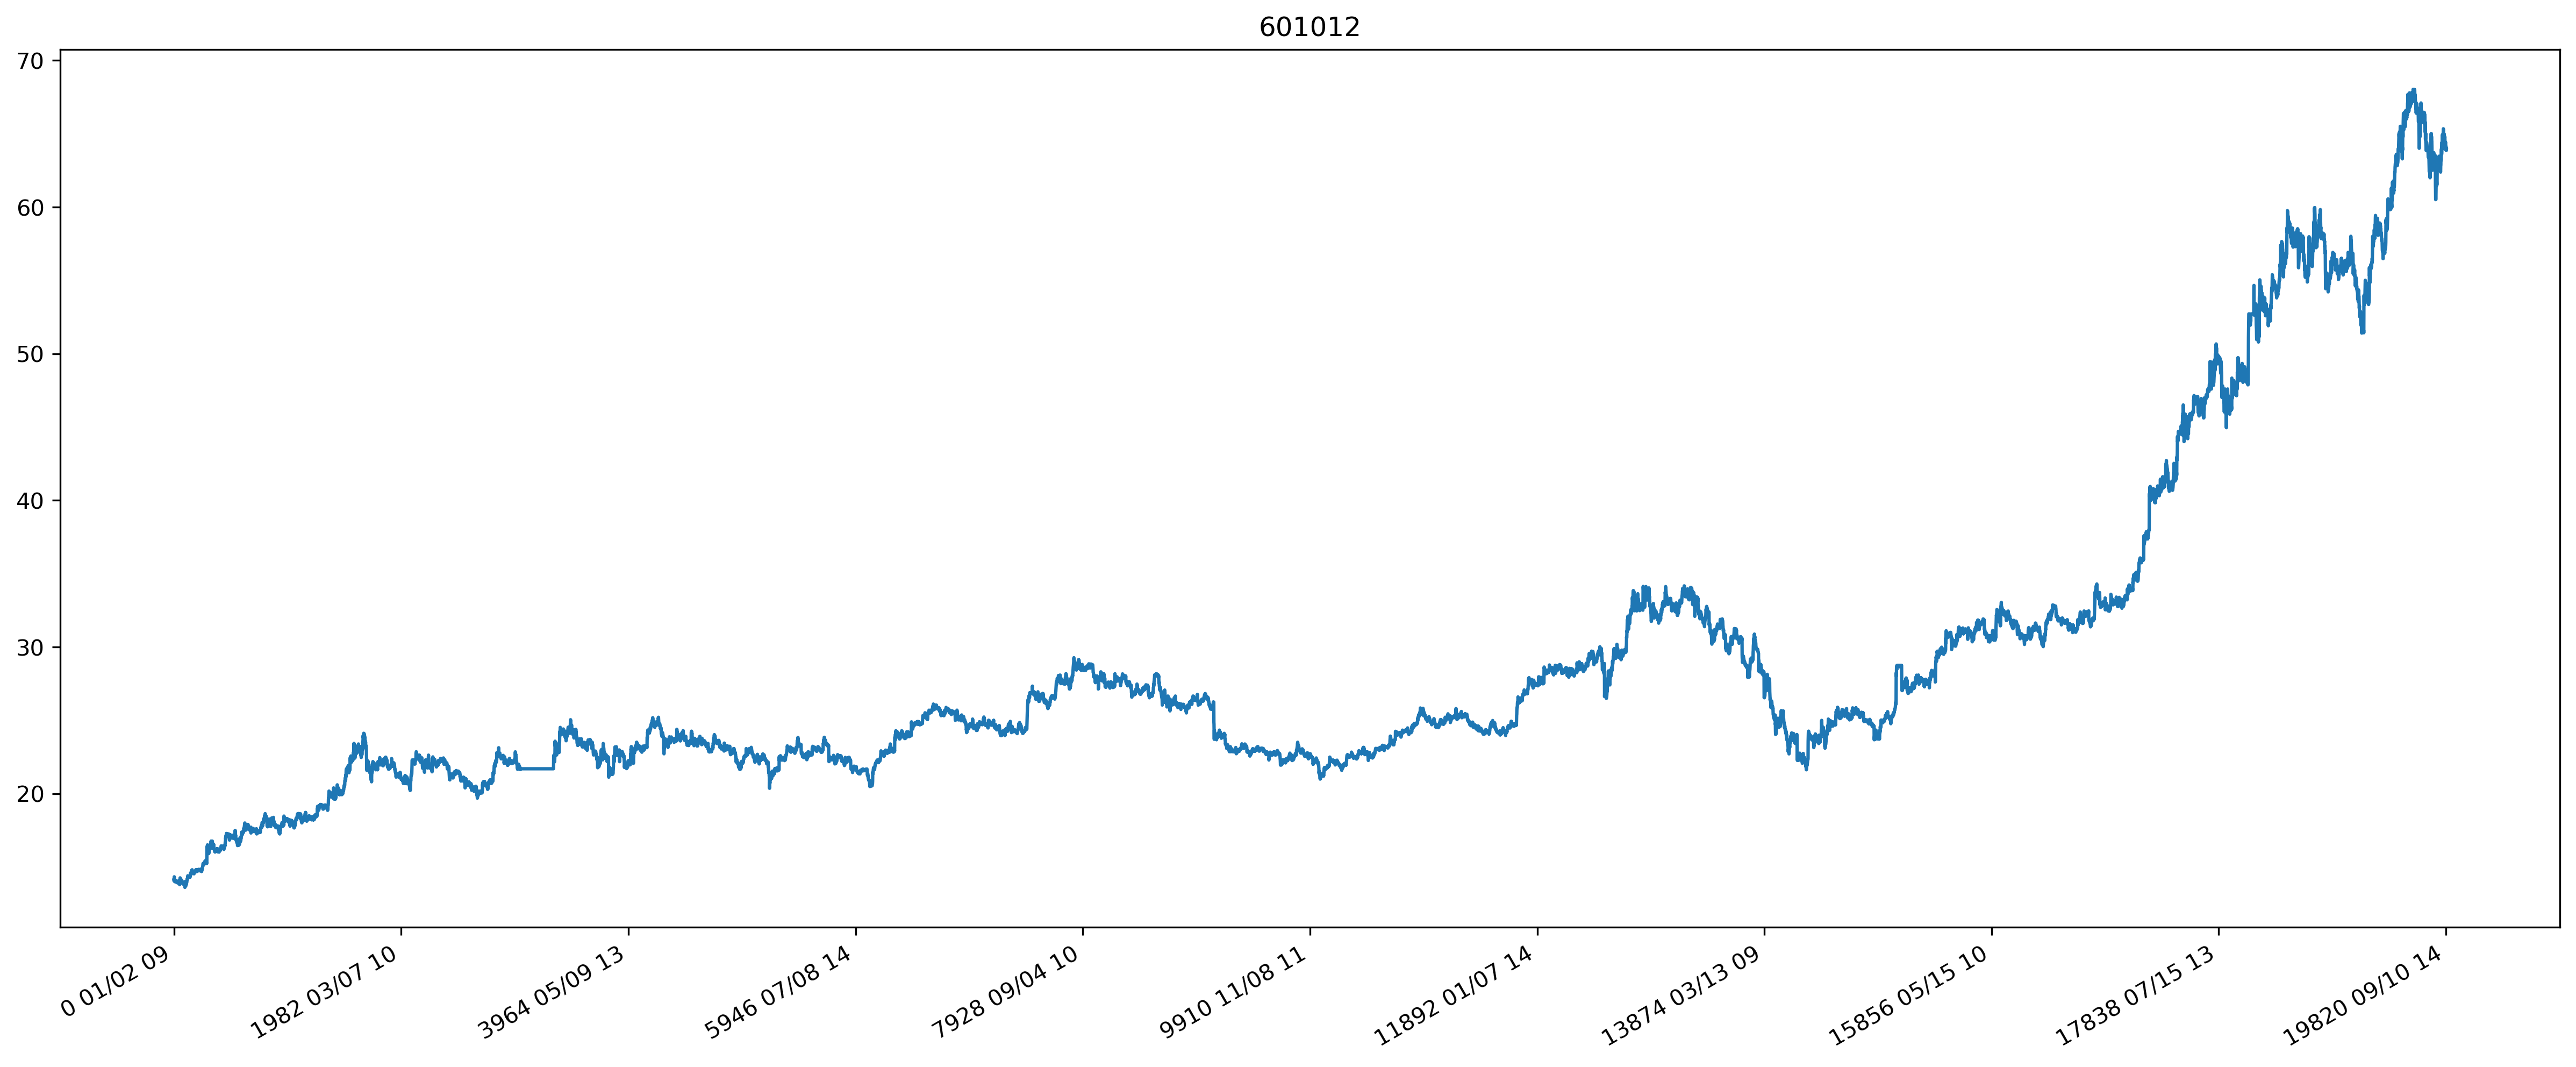

In [36]:
overscan_fig(dt_df, stockID)

In [ ]:
dt_df.iloc[5522].name

In [ ]:
c = '2019-06-26'
r = 700

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

[9000, 14000] [35.1789, 20.9682]


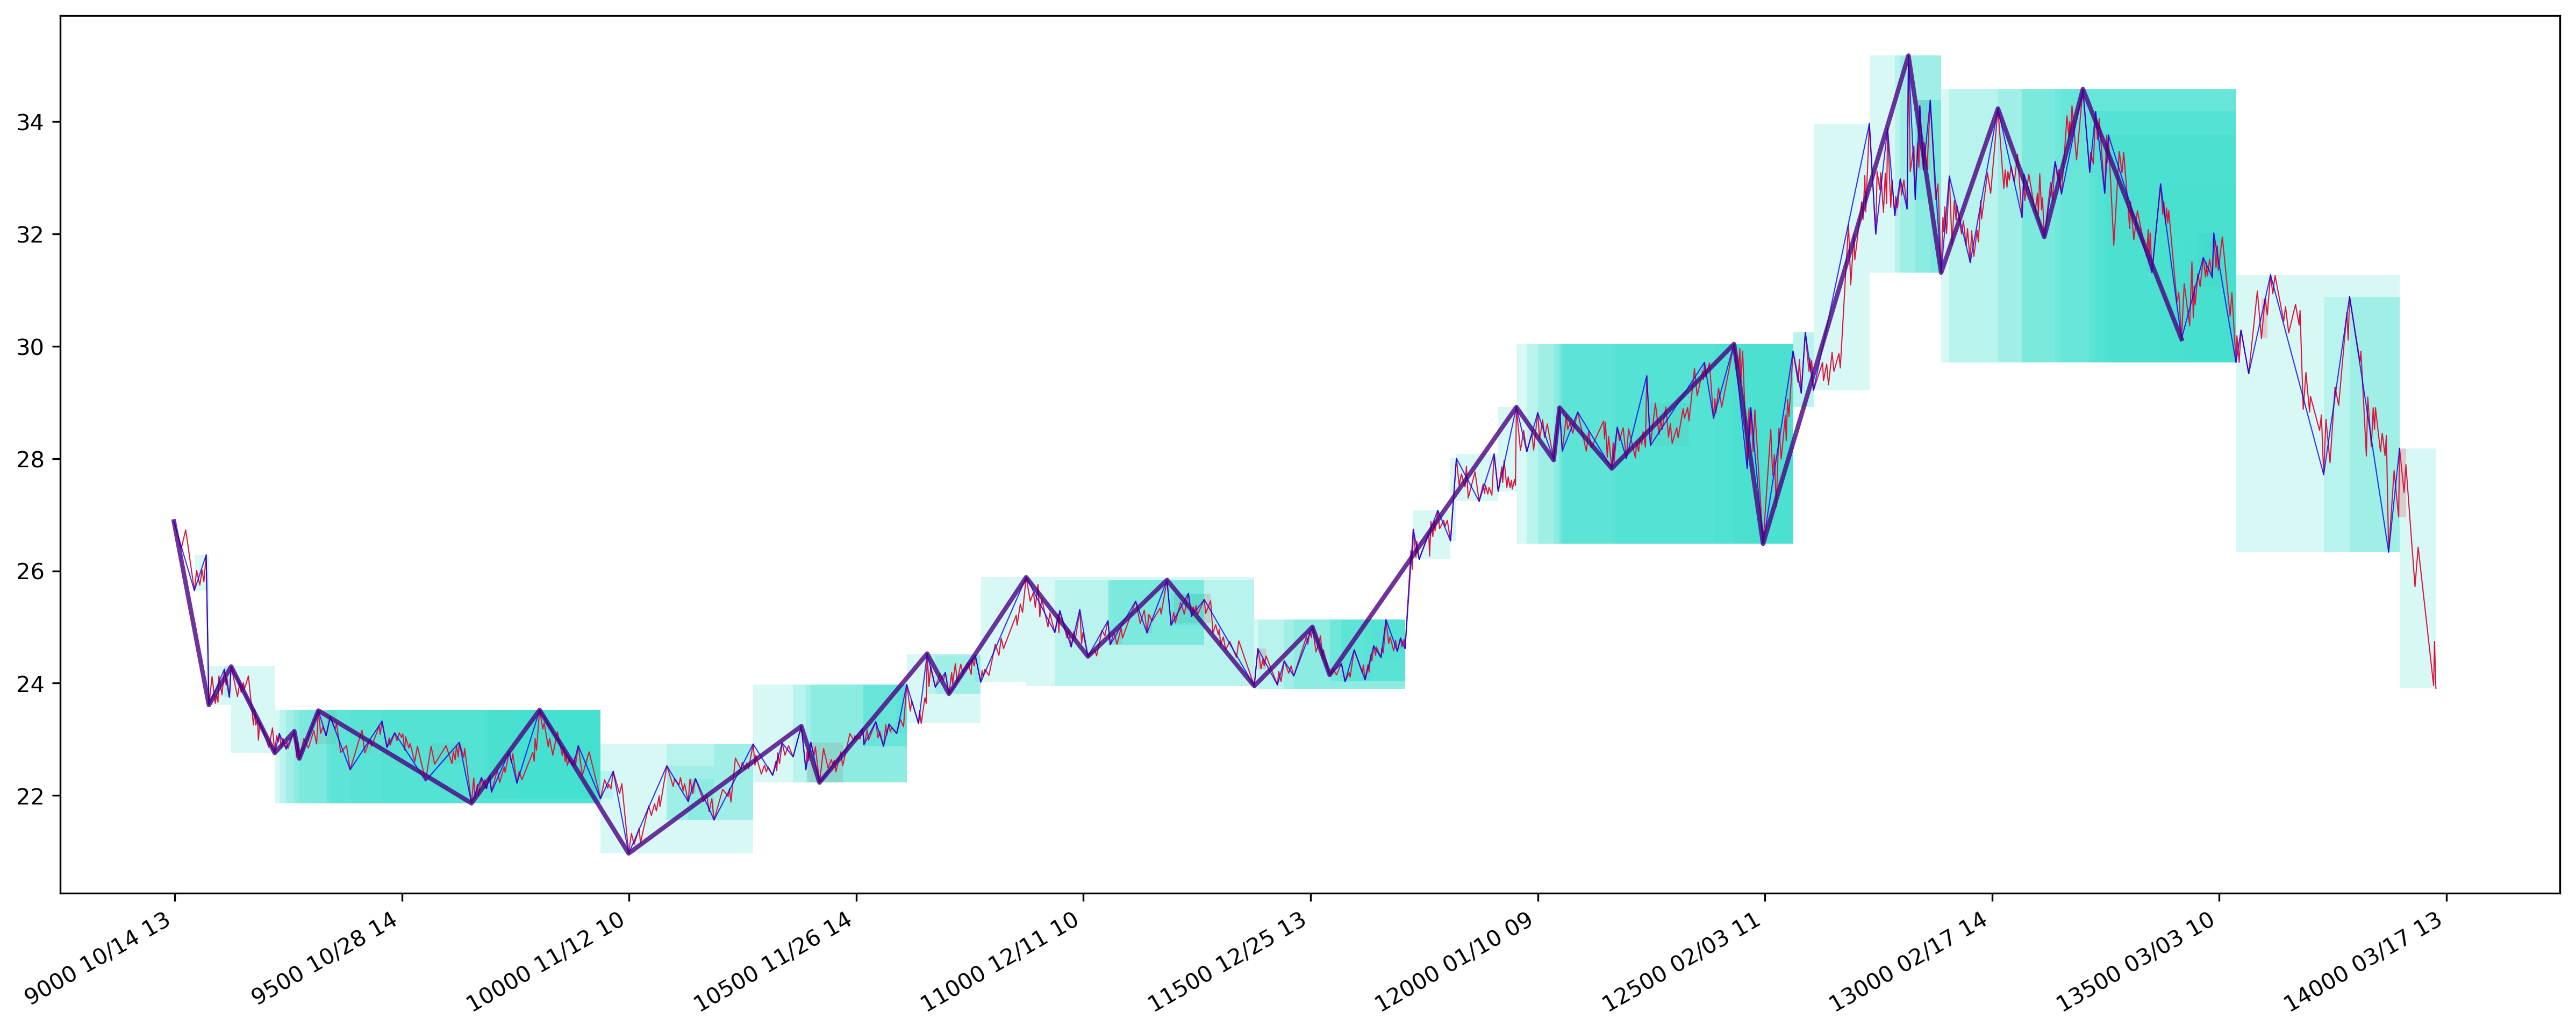

In [46]:
s_idx, e_idx =9000,14000
# 绘制全景图
# Input: dt_df, 
#        [s_idx: e_idx], 
#       对象列表？？ 

## 拼接 x_label
dt_df['label2'] = dt_df.index
dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
dt_df.drop(['label2'],axis=1, inplace=True)

## x_label 转换函数
x_fmt = dt_df['label'].values.tolist()
def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

## 底图数据 by [s_idx: e_idx]
x = [s_idx, e_idx]
y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
print(x,y)

## draw
fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)

#=== 底图设置
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
ax.plot(x, y, alpha=0)

#=== 
Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8, marker=False)
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)

center_list0 = [cc for cc in m.CLv0_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list0)
center_list1 = [cc for cc in m.CLv1_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list1, facecolor='turquoise')

center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
#draw_center(ax, center_list2,  facecolor='indigo', marker=True)

sig_list =[ss for ss in SIG_overlapMv.L if s_idx<=ss.TmInit <=e_idx]
for ss in sig_list:
    #ax.text(ss.TmInit, ss.sigV+1, ss.remark)
    ax.annotate(ss.remark.split(',')[0], xy=(ss.TmInit, ss.sigV), xytext=(ss.TmInit, ss.sigV+2),
            arrowprops=dict(facecolor='black',headwidth=2,headlength=2, shrink=0.05, width=0.5),
            )
'''
pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list1 = [pp for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list1, facecolor='turquoise', alpha=0.8)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=False, alpha=0.8)
'''

fig.autofmt_xdate()
plt.savefig('图{}-{}_{}Lv1.png'.format(stockID, str(int(s_idx)), str(int(e_idx))))

In [ ]:
c = 5600
r = 100
s_idx, e_idx = c-r, c+r

detial_fig(dt_df, s_idx, e_idx)

In [ ]:
for s in SIG_overlapMv.L:
    if s.lv_TmS == 10323:
        print(s.remark)
        break

In [ ]:
#[10323.0, 10367.0, 10419.0]

In [ ]:
for st in m.Lv1_L:
    if st.start.TmIdx == 10323:
        print(st.start.V, st.peak.V, st.mp[st.pp], st.ML[st.mp[st.pp] - 1].peak, st.ML[st.mp[st.pp]], m.Lv1_L.index(st))
        break

In [ ]:
[[st.start.V, st.peak.V] for st in m.Lv0_L[1520:1525]]
    

In [ ]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

In [ ]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)